### Package Installation and Preparation

1.  **Exploratory Data Analysis (EDA):**
   - **xarray:** For working with multi-dimensional labeled arrays, especially for handling NetCDF files.
   - **NumPy:** For numerical operations and array manipulations.ns.
   - **Pandas:** For data manipulation and analysis.
   - **Matplotlib and Seaborn:** For data visualization and statistical graphics.

```bash
pip install xarray numpy pandas matplotlib seaborn
```

2. **Investigate Temporal Patterns, Trends, and Relationships:**
   - **xarray:** For time-series analysis and handling multi-dimensional data.
   - **Matplotlib and Seaborn:** For time-series plotting and visualization.

```bash
pip install xarray matplotlib seaborn
```

3. **Correlation and Regression:**
   - **xarray:** For handling and analyzing multi-dimensional data.
   - **SciPy:** For statistical analysis, including correlation and regression.

```bash
pip install xarray scipy
```

4. **GIS Tools for Spatial Analysis:**
   - **Geopandas:** For working with geospatial data in a Pandas-like environment.
   - **Folium:** For creating interactive leaflet maps.
   - **Shapely:** For geometry operations.

```bash
pip install geopandas folium shapely
```

In [9]:
#!pip install xarray numpy pandas matplotlib seaborn scipy

In [6]:
#!pip install geopandas folium shapely

In [19]:
#!pip install toolz

### Data Preparation


For handling NetCDF files, xarray is particularly powerful and integrates well with other scientific libraries. Here's a basic example of how you might use xarray to find the difference between V wind at 200 hPa and 800 hPa levels:

```python
import xarray as xr

# Load NetCDF data using xarray
wind_v_200hpa = xr.open_dataset('path/to/wind_v_200hpa.nc')['v_component_of_wind']
wind_v_800hpa = xr.open_dataset('path/to/wind_v_800hpa.nc')['v_component_of_wind']

# Calculate the vertical wind shear
vertical_wind_shear = wind_v_200hpa - wind_v_800hpa
```

### CMIP5 Dataset

In [5]:
import xarray as xr

#### Vertical Wind Component

In [6]:
## Vertical Wind Component 5 years each from 2006 to 2020
wind_v_06_10 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
wind_v_11_15 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
wind_v_16_20 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

## merge data into one array
wind_vc = xr.concat([wind_v_06_10, wind_v_11_15, wind_v_16_20], dim = "time")

In [23]:
#print(wind_vc)

In [7]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = wind_vc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [32]:
# Print the updated dataset
#print(west_africa_data)

In [43]:
#west_africa_data

In [8]:
# Extract data for the 200 hPa and 800 hPa levels
wind_200hpa = west_africa_data.sel(plev=20000)  # 200 hPa level
wind_850hpa = west_africa_data.sel(plev=85000)  # 800 hPa level

# Calculate vertical wind shear by subtracting values at 800 hPa from values at 200 hPa
vertical_wind_shear = wind_200hpa.va - wind_850hpa.va

In [155]:
# Print the resulting dataset
# print(vertical_wind_shear)

In [63]:
#vertical_wind_shear

#### Precipitatlon Flux

In [9]:
## Precipitation Flux
pr_06_10 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
pr_11_15 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
pr_16_20 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

# merge data into an array
precip = xr.concat([pr_06_10, pr_11_15, pr_16_20], dim = "time")

In [10]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = precip.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [11]:
# Extract precipitation data
pr_flux = west_africa_data.pr

In [64]:
#print(pr_flux)

In [156]:
# pr_flux

### Exploratory Data Analysis (EDA):

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
import os

In [120]:
#print(len(time_values))
#print(len(wind_shear_values))
#mdates.num2date(time_values)

### Create Directory for Saving Figures

In [13]:
import os

# Create a directory named 'figures' if it doesn't exist
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

In [56]:
def plot_time_series(time_values, variable_values, variable_name, save_dir=None, unit='',color=None):
    """
    Plots a time series.

    Parameters:
    - time_values (array): Array of time values.
    - variable_values (array): Array of variable values.
    - variable_name (str): Name of the variable to be displayed in labels and title.
    - save_dir (str): Directory to save the plot. If None, the plot is not saved.
    - unit (str): The unit of measurement for the variable, e.g., 'm/s' for meters per second.
    - color (str): Color of the plot.

    Returns:
    - None
    """

    # Convert cftime datetime values to Python datetime objects
    time_values = [mdates.date2num(val) for val in time_values]

    # Reshape variable values to match the shape of time values
    variable_values = variable_values[:len(time_values)]

    # Plotting the time series
    plt.figure(figsize=(12, 6))
    plt.plot(mdates.num2date(time_values), variable_values, label=variable_name, color=color)
    plt.xlabel('Time')
    plt.ylabel(f'{variable_name} ({unit})')
    plt.title(f'{variable_name} Time Series')
    plt.legend()
    plt.grid(False)

    # Save the figure if save_dir is provided
    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, f'{variable_name}_Time_Series.png'))

    # Display the plot
    plt.show()


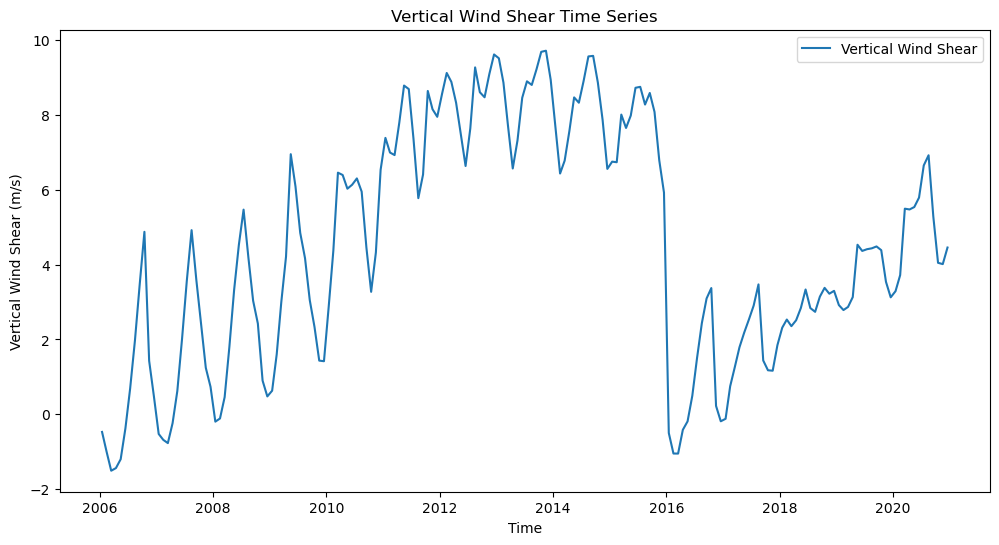

In [57]:
# Vertical Wind Shear
plot_time_series(vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', 'figures','m/s')


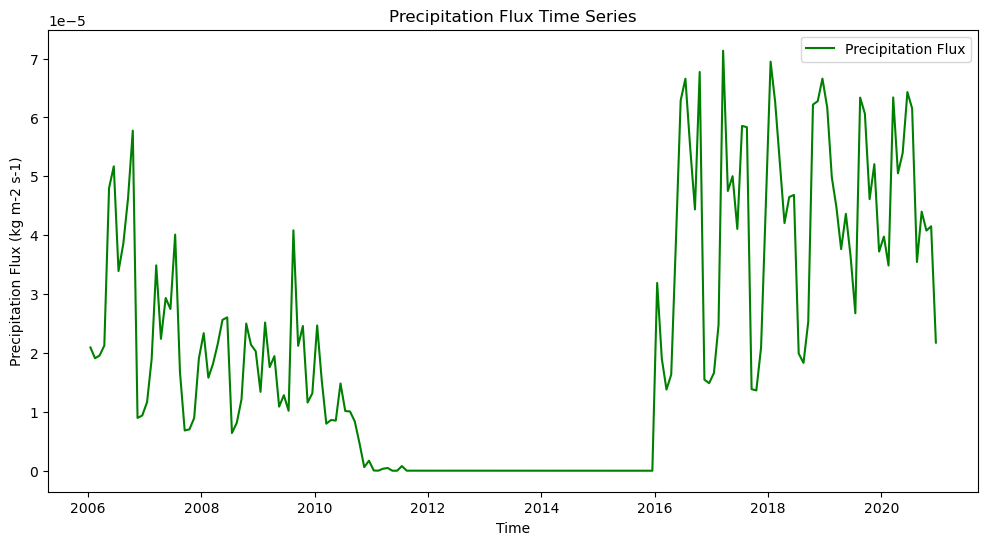

In [58]:
# Precipitation Flux
plot_time_series(pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', 'figures', 'kg m-2 s-1', color='green')

In [19]:

import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_dual_time_series(primary_time, primary_values, primary_label, primary_color, secondary_time, secondary_values, secondary_label, secondary_color, save_dir=None, unit_primary='', unit_secondary=''):
    """
    Plots two time series on the same plot with a secondary y-axis.

    Parameters:
    - primary_time (array): Array of time values for the primary time series.
    - primary_values (array): Array of variable values for the primary time series.
    - primary_label (str): Label for the primary time series.
    - primary_color (str): Color for the primary time series.

    - secondary_time (array): Array of time values for the secondary time series.
    - secondary_values (array): Array of variable values for the secondary time series.
    - secondary_label (str): Label for the secondary time series.
    - secondary_color (str): Color for the secondary time series.

    - save_dir (str): Directory to save the plot. If None, the plot is not saved.
    - unit_primary (str): Unit for the primary variable.
    - unit_secondary (str): Unit for the secondary variable.

    Returns:
    - None
    """


    # Convert primary_time and secondary_time to numeric values
    primary_time_numeric = [mdates.date2num(val) for val in primary_time]
    secondary_time_numeric = [mdates.date2num(val) for val in secondary_time]

    # Reshape primary and secondary values to match the shape of time values
    primary_values = primary_values[:len(primary_time_numeric)]
    secondary_values = secondary_values[:len(primary_time_numeric)]

    # Create a figure and axis for the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the primary time series on the left y-axis
    ax1.plot(mdates.num2date(primary_time_numeric), primary_values, label=primary_label, color=primary_color)
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'{primary_label} ({unit_primary})')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')
    plt.grid(False)

    # Creating a secondary y-axis for the secondary time series on the right
    ax2 = ax1.twinx()
    ax2.plot(mdates.num2date(secondary_time_numeric), secondary_values, label=secondary_label, color=secondary_color)
    ax2.set_ylabel(f'{secondary_label} ({unit_secondary})')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper right')
    plt.grid(False)

    # Save the figure if save_dir is provided
    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, f'{primary_label}_{secondary_label}_Time_Series.png'))

    # Display the plot
    plt.title(f'{primary_label} and {secondary_label} Time Series')
    plt.grid(False)
    plt.show()


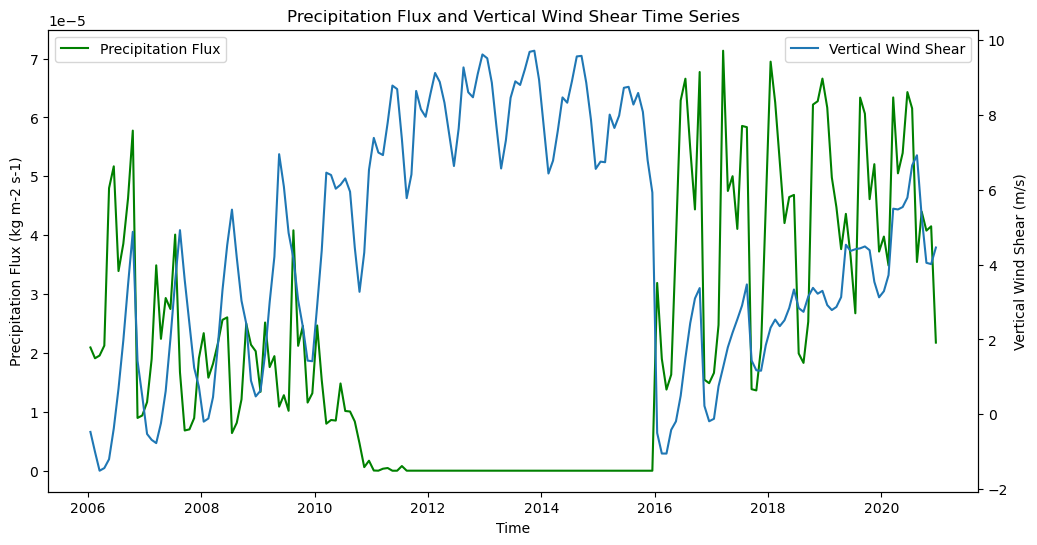

In [21]:
plot_dual_time_series(
    pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', 'green',
    vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', None,
    save_dir='figures', unit_primary='kg m-2 s-1', unit_secondary='m/s'
)


In [62]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np

# # Extracting variables
# time_values = vertical_wind_shear.time.values
# wind_shear_values = vertical_wind_shear.values.flatten()

# # Convert cftime datetime values to Python datetime objects
# time_values = [mdates.date2num(val) for val in time_values]

# # Reshape wind shear values to match the shape of time values
# wind_shear_values = wind_shear_values[:len(time_values)]

# # Plotting the time series without yearly averaging
# plt.figure(figsize=(12, 6))
# plt.plot(mdates.num2date(time_values), wind_shear_values, label='Vertical Wind Shear')
# plt.xlabel('Time')
# plt.ylabel('Vertical Wind Shear (m/s)')
# plt.title('Vertical Wind Shear Time Series')
# plt.legend()
# plt.grid(False)

# # Save the figure in the 'figures' directory
# plt.savefig(os.path.join(save_dir, 'Vertical Wind Shear Time Series.png'))

# # Display the plot
# plt.show()


In [61]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np

# # Extracting variables
# time_values = pr_flux.time.values
# pr_flux_values = pr_flux.values.flatten()

# # Convert cftime datetime values to Python datetime objects
# time_values = [mdates.date2num(val) for val in time_values]

# # Reshape wind shear values to match the shape of time values
# pr_flux_values = pr_flux_values[:len(time_values)]

# # Plotting the time series without yearly averaging
# plt.figure(figsize=(12, 6))
# plt.plot(mdates.num2date(time_values), pr_flux_values, label='Precipitation Flux', color='green')
# plt.xlabel('Time')
# plt.ylabel('Precipitation Flux (kg m-2 s-1)')
# plt.title('Precipitation Flux Time Series')
# plt.legend()
# plt.grid(False)

# # Save the figure in the 'figures' directory
# plt.savefig(os.path.join(save_dir, 'Precipitation Flux Time Series'))

# # Display the plot
# plt.show()


In [22]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# import numpy as np



# # Extracting variables for Precipitation Flux
# time_values_pr_flux = pr_flux.time.values
# pr_flux_values = pr_flux.values.flatten()

# # Convert cftime datetime values to Python datetime objects
# time_values_pr_flux = [mdates.date2num(val) for val in time_values_pr_flux]

# # Reshape precipitation flux values to match the shape of time values
# pr_flux_values = pr_flux_values[:len(time_values_pr_flux)]

# # Extracting variables for Vertical Wind Shear
# time_values_wind_shear = vertical_wind_shear.time.values
# wind_shear_values = vertical_wind_shear.values.flatten()

# # Convert cftime datetime values to Python datetime objects
# time_values_wind_shear = [mdates.date2num(val) for val in time_values_wind_shear]

# # Reshape wind shear values to match the shape of time values
# wind_shear_values = wind_shear_values[:len(time_values_wind_shear)]

# # Plotting both time series on the same plot with secondary y-axis
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plotting Precipitation Flux on the left y-axis
# ax1.plot(mdates.num2date(time_values_pr_flux), pr_flux_values, label='Precipitation Flux', color='green')
# ax1.set_xlabel('Time')
# ax1.set_ylabel('Precipitation Flux (kg m-2 s-1)')
# ax1.tick_params(axis='y')
# ax1.legend(loc='upper left')
# plt.grid(False)

# # Creating a secondary y-axis for Vertical Wind Shear on the right
# ax2 = ax1.twinx()
# ax2.plot(mdates.num2date(time_values_wind_shear), wind_shear_values, label='Vertical Wind Shear')
# ax2.set_ylabel('Vertical Wind Shear (m/s)')
# ax2.tick_params(axis='y')
# ax2.legend(loc='upper right')
# plt.grid(False)

# plt.title('Precipitation Flux and Vertical Wind Shear Time Series')
# plt.grid(False)

# # Save the figure in the 'figures' directory
# plt.savefig(os.path.join(save_dir, 'Precipitation Flux and Vertical Wind Shear Time Series.png'))

# # Display the plot
# plt.show()


### Investigate Temporal Patterns and Relationships:

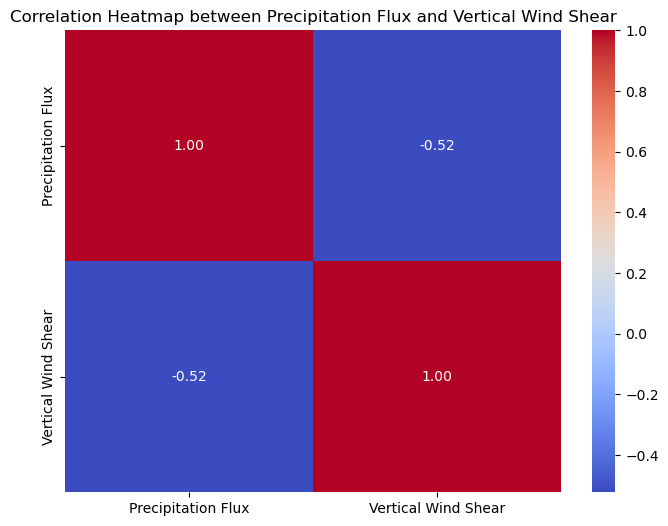

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os


# Extracting variables for Precipitation Flux
time_values_pr_flux = pr_flux.time.values
pr_flux_values = pr_flux.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values_pr_flux = [mdates.date2num(val) for val in time_values_pr_flux]

# Reshape precipitation flux values to match the shape of time values
pr_flux_values = pr_flux_values[:len(time_values_pr_flux)]

# Extracting variables for Vertical Wind Shear
time_values_wind_shear = vertical_wind_shear.time.values
wind_shear_values = vertical_wind_shear.values.flatten()

# Convert cftime datetime values to Python datetime objects
time_values_wind_shear = [mdates.date2num(val) for val in time_values_wind_shear]

# Reshape wind shear values to match the shape of time values
wind_shear_values = wind_shear_values[:len(time_values_wind_shear)]

# Load the data into DataFrames
df_pr_flux = pd.DataFrame({'Time': time_values_pr_flux, 'Precipitation Flux': pr_flux_values})
df_wind_shear = pd.DataFrame({'Time': time_values_wind_shear, 'Vertical Wind Shear': wind_shear_values})

# Convert time to datetime
df_pr_flux['Time'] = pd.to_datetime(df_pr_flux['Time'])
df_wind_shear['Time'] = pd.to_datetime(df_wind_shear['Time'])

# Set Time as the index
df_pr_flux.set_index('Time', inplace=True)
df_wind_shear.set_index('Time', inplace=True)

# Resample data to monthly averages
df_pr_flux_monthly = df_pr_flux.resample('M').mean()
df_wind_shear_monthly = df_wind_shear.resample('M').mean()

# Check for correlations
df_combined = pd.concat([df_pr_flux, df_wind_shear], axis=1)
correlation_matrix = df_combined.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Precipitation Flux and Vertical Wind Shear')
plt.savefig(os.path.join(save_dir, 'correlation_heatmap.png'))

# Show the plots
plt.show()


In [169]:
correlation_matrix

,Precipitation Flux,Vertical Wind Shear
Precipitation Flux,1.000000,-0.522382
Vertical Wind Shear,-0.522382,1.000000


The correlation matrix shows the correlation coefficients between the Precipitation Flux and Vertical Wind Shear. Each number in the matrix represents the strength and direction of the linear relationship between the corresponding variables.

Here's how to interpret the matrix:

1. **Correlation between Precipitation Flux and Itself:**
   - The correlation of a variable with itself is always 1.0 (perfect positive correlation). In this case, the correlation between Precipitation Flux and Precipitation Flux is 1.0.

2. **Correlation between Precipitation Flux and Vertical Wind Shear:**
   - The correlation coefficient between Precipitation Flux and Vertical Wind Shear is approximately -0.52.
   - The negative sign indicates a negative correlation, which means that as one variable increases, the other tends to decrease.
   - The magnitude (-0.52) suggests a moderate strength of the correlation. In statistical terms, this suggests a moderate negative linear relationship between Precipitation Flux and Vertical Wind Shear.

3. **Correlation between Vertical Wind Shear and Itself:**
   - Similar to Precipitation Flux, the correlation of Vertical Wind Shear with itself is 1.0.

In summary, the correlation matrix indicates that there is a moderate negative correlation between Precipitation Flux and Vertical Wind Shear. It implies that, on average, when Precipitation Flux increases, Vertical Wind Shear tends to decrease, and vice versa. Keep in mind that correlation does not imply causation; it only measures the strength and direction of linear relationships.

### Statistical Analyses:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'vertical_wind_shear' is your independent variable and 'pr_flux' is the dependent variable
X = vertical_wind_shear.values.reshape(-1, 1)
y = pr_flux.values.flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict precipitation for the test set
y_pred = model.predict(X_test)


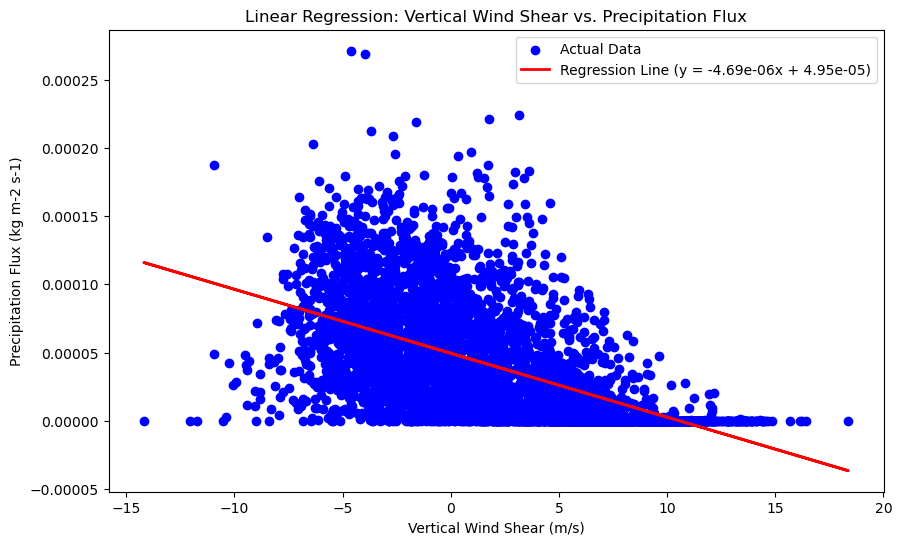

In [18]:
# Extract the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Visualize the model
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
label = f'Regression Line (y = {slope:.2e}x + {intercept:.2e})'
plt.plot(X_test, y_pred, color='red', linewidth=2, label=label)

# Add labels and title
plt.xlabel('Vertical Wind Shear (m/s)')
plt.ylabel('Precipitation Flux (kg m-2 s-1)')
plt.title('Linear Regression: Vertical Wind Shear vs. Precipitation Flux')
plt.legend()
plt.grid(False)

plt.savefig(os.path.join(save_dir, 'Linear Regression_Vertical_Wind_Shear_vs_Precipitation_Flux.png'))

# Show the plots
plt.show()


In [38]:
# !pip install cartopy

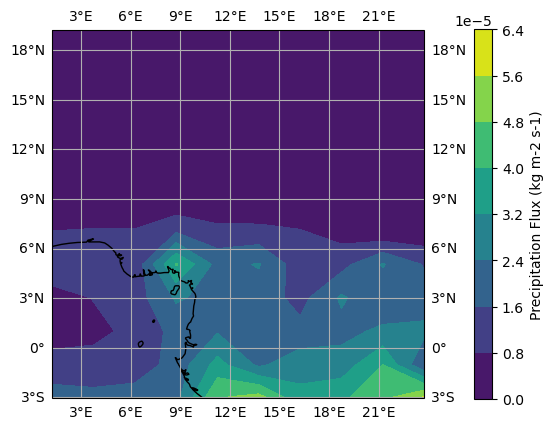

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have an xarray DataArray 'pr_flux' with 'lat', 'lon', and 'values'
#pr_flux = ...

# Create a Cartopy GeoAxes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data using contourf
cf = ax.contourf(pr_flux['lon'], pr_flux['lat'], pr_flux.isel(time=0), transform=ccrs.PlateCarree(), cmap='viridis')

# Add colorbar
cbar = plt.colorbar(cf, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Precipitation Flux (kg m-2 s-1)')

# Add coastlines, gridlines, etc.
ax.coastlines()
ax.gridlines(draw_labels=True)

# Save the figure
fig.savefig('figures/pr_flux_plot.png', bbox_inches='tight')
plt.show()


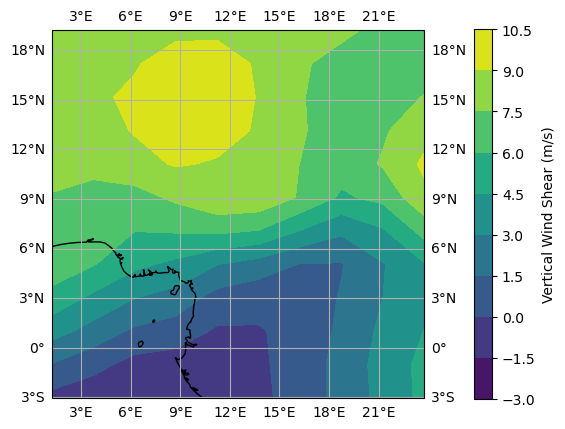

In [129]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have an xarray DataArray 'vertical_wind_shear' with 'lat', 'lon', and 'values'
# vertical_wind_shear = ...

# Create a Cartopy GeoAxes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data using contourf
cf = ax.contourf(vertical_wind_shear['lon'], vertical_wind_shear['lat'], vertical_wind_shear.isel(time=0), transform=ccrs.PlateCarree(), cmap='viridis')

# Add colorbar
cbar = plt.colorbar(cf, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Vertical Wind Shear (m/s)')

# Add coastlines, gridlines, etc.
ax.coastlines()
ax.gridlines(draw_labels=True)

# Save the figure
fig.savefig('figures/vertical_wind_shear_plot.png', bbox_inches='tight')
plt.show()


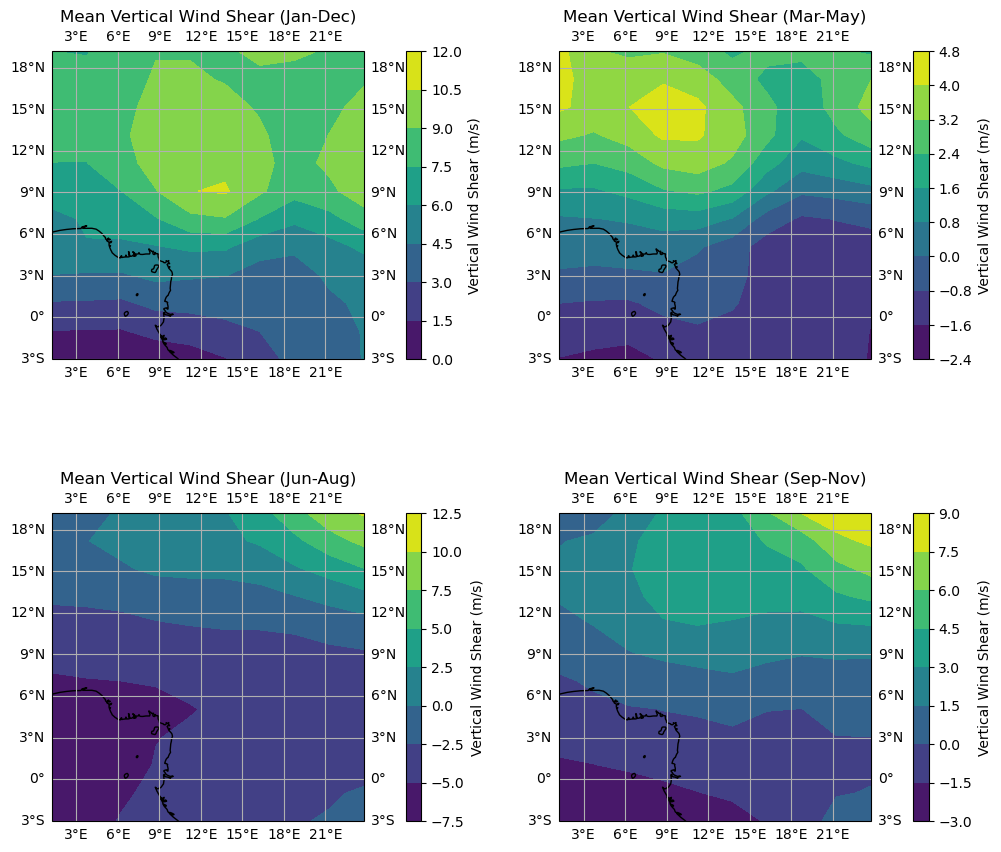

In [141]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.dates as mdates
import xarray as xr

# Assuming you have an xarray DataArray 'vertical_wind_shear' with 'time', 'lat', 'lon'
# vertical_wind_shear = ...

# Create a directory to save figures
save_dir = 'figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define three-month periods
months_periods = [
    [12, 1, 2],  # DJF
    [3, 4, 5],   # MAM
    [6, 7, 8],   # JJA
    [9, 10, 11]  # SON
]

# Create a Cartopy GeoAxes grid
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots for easy iteration
axes_flat = axes.flatten()

# Select and save three-month periods
for i, months in enumerate(months_periods):
    # Select the three-month period
    selected_period = vertical_wind_shear.sel(time=vertical_wind_shear['time.month'].isin(months))

    # Plotting the data using contourf
    cf = axes_flat[i].contourf(selected_period['lon'], selected_period['lat'], selected_period.mean(dim='time'),
                               transform=ccrs.PlateCarree(), cmap='viridis')

    # Add colorbar
    cbar = plt.colorbar(cf, ax=axes_flat[i], orientation='vertical', pad=0.1)
    cbar.set_label('Vertical Wind Shear (m/s)')

    # Add coastlines, gridlines, etc.
    axes_flat[i].coastlines()
    axes_flat[i].gridlines(draw_labels=True)

    # Set the title
    axes_flat[i].set_title(f'Mean Vertical Wind Shear ({selected_period.time.values[0].strftime("%b")}-{selected_period.time.values[-1].strftime("%b")})')

# Save the figure
fig.savefig(os.path.join(save_dir, 'vertical_wind_shear_plot_3_month_period.png'), bbox_inches='tight')
plt.show()


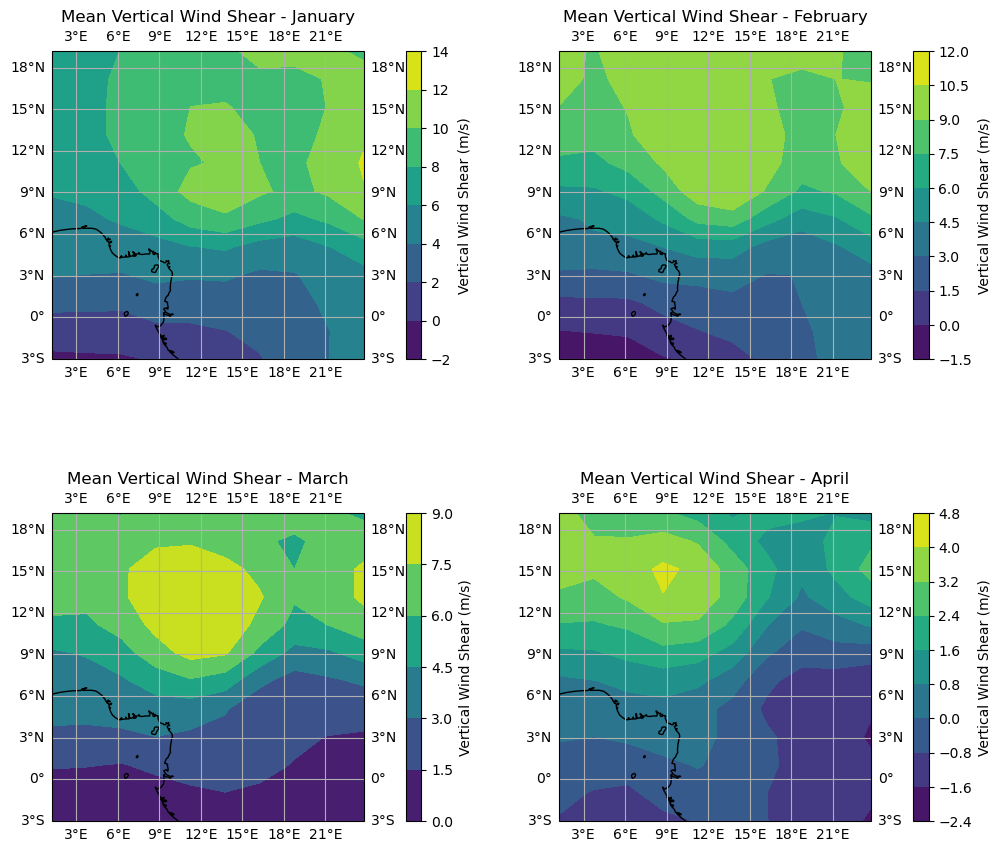

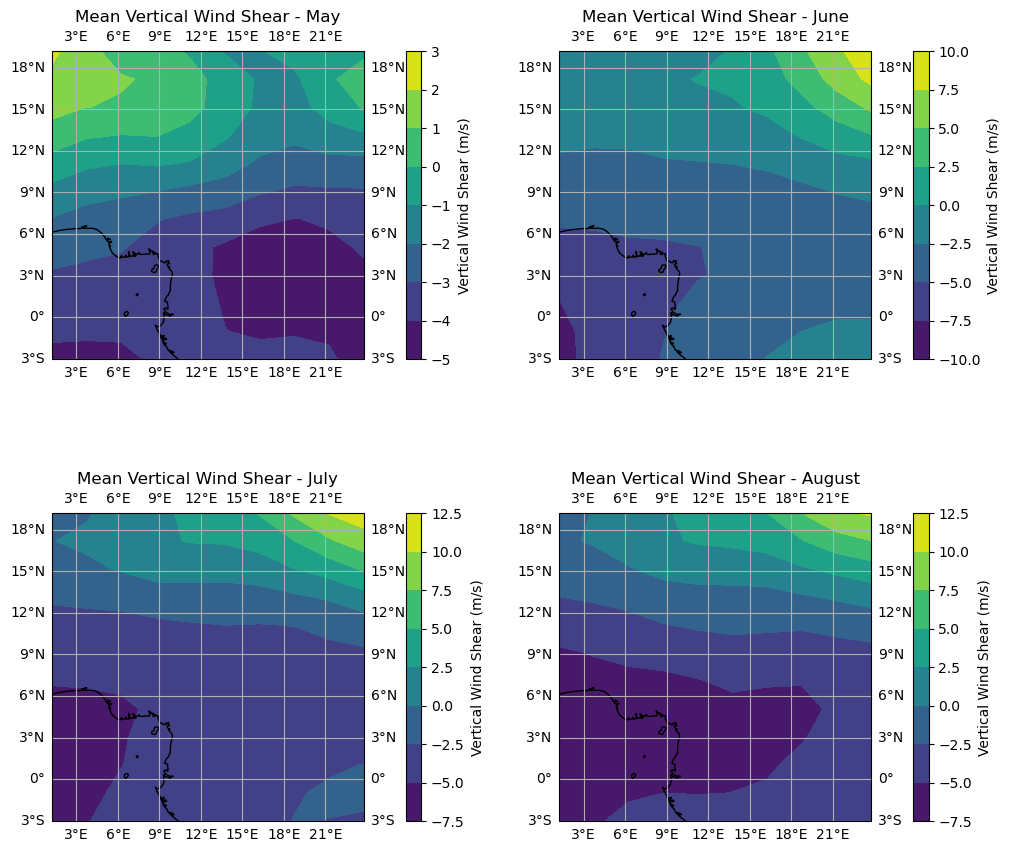

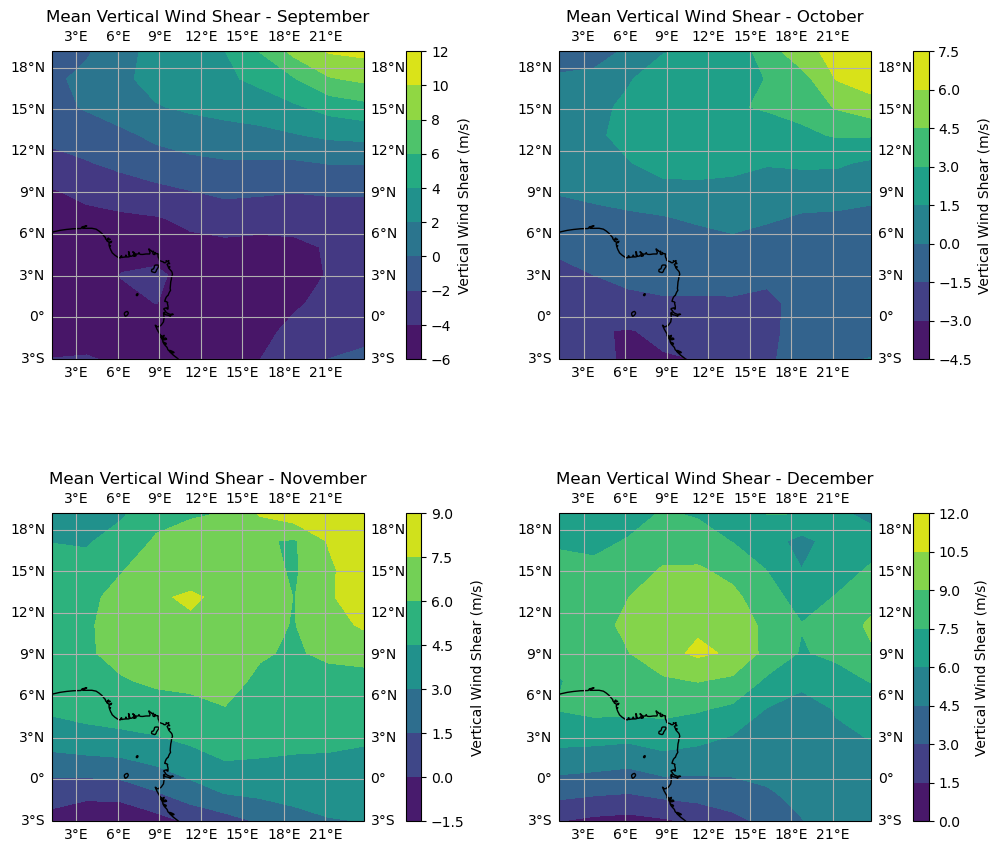

In [140]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have an xarray DataArray 'vertical_wind_shear' with 'time', 'lat', 'lon'
# vertical_wind_shear = ...

# Create a directory to save figures
save_dir = 'figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define all months
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Repeat the process three times for the entire year
for plot_num in range(3):
    # Create a Cartopy GeoAxes grid for each plot
    fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))
    fig.subplots_adjust(hspace=0.5)

    # Flatten the 2D array of subplots for easy iteration
    axes_flat = axes.flatten()

    # Select and save each month for the current plot
    for i, month in enumerate(months[plot_num * 4: (plot_num + 1) * 4]):
        # Select the month
        selected_month = vertical_wind_shear.sel(time=vertical_wind_shear['time.month'] == month)

        # Plotting the data using contourf
        cf = axes_flat[i].contourf(selected_month['lon'], selected_month['lat'], selected_month.mean(dim='time'),
                                   transform=ccrs.PlateCarree(), cmap='viridis')

        # Add colorbar
        cbar = plt.colorbar(cf, ax=axes_flat[i], orientation='vertical', pad=0.1)
        cbar.set_label('Vertical Wind Shear (m/s)')

        # Add coastlines, gridlines, etc.
        axes_flat[i].coastlines()
        axes_flat[i].gridlines(draw_labels=True)

        # Set the title
        axes_flat[i].set_title(f'Mean Vertical Wind Shear - {selected_month.time.values[0].strftime("%B")}')

    # Save the figure for the current plot
    fig.savefig(os.path.join(save_dir, f'vertical_wind_shear_plot_quarter_{plot_num + 1}.png'), bbox_inches='tight')
    plt.show()


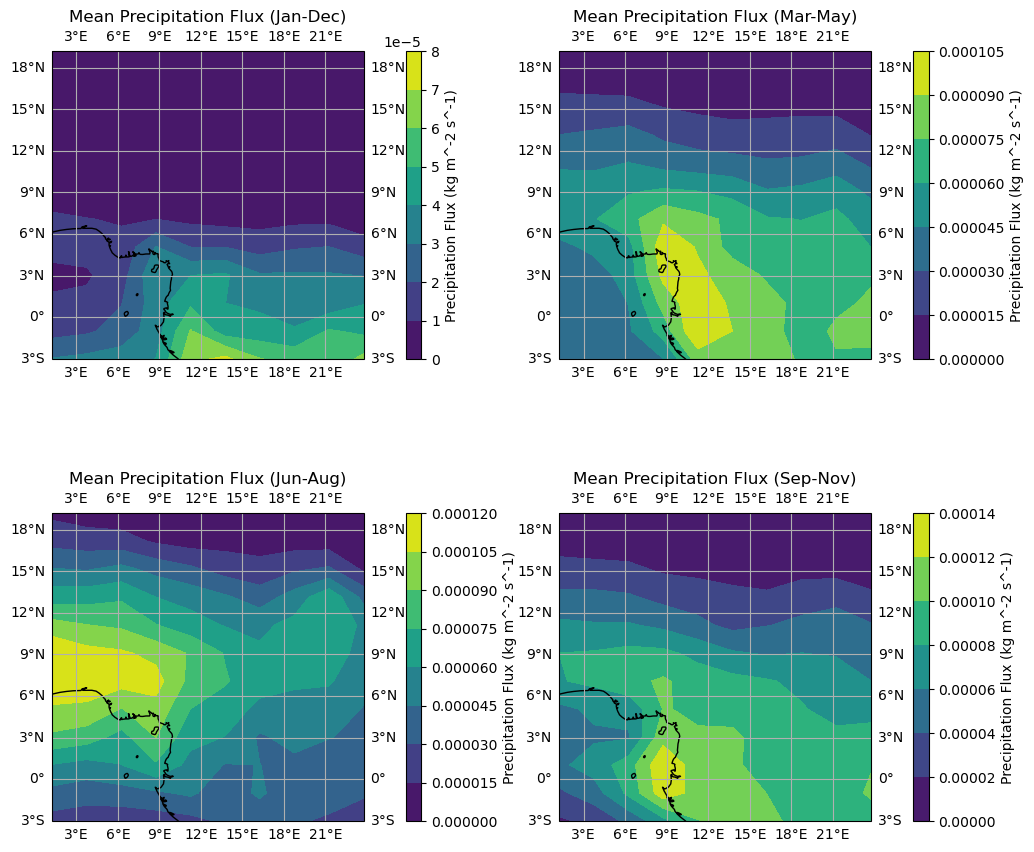

In [142]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have an xarray DataArray 'pr_flux' with 'time', 'lat', 'lon'
# pr_flux = ...

# Create a directory to save figures
save_dir = 'figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define three-month periods
months_periods = [
    [12, 1, 2],  # DJF
    [3, 4, 5],   # MAM
    [6, 7, 8],   # JJA
    [9, 10, 11]  # SON
]

# Create a Cartopy GeoAxes grid
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots for easy iteration
axes_flat = axes.flatten()

# Select and save three-month periods for pr_flux
for i, months in enumerate(months_periods):
    # Select the three-month period
    selected_period = pr_flux.sel(time=pr_flux['time.month'].isin(months))

    # Plotting the data using contourf
    cf = axes_flat[i].contourf(selected_period['lon'], selected_period['lat'], selected_period.mean(dim='time'),
                               transform=ccrs.PlateCarree(), cmap='viridis')

    # Add colorbar
    cbar = plt.colorbar(cf, ax=axes_flat[i], orientation='vertical', pad=0.1)
    cbar.set_label('Precipitation Flux (kg m^-2 s^-1)')

    # Add coastlines, gridlines, etc.
    axes_flat[i].coastlines()
    axes_flat[i].gridlines(draw_labels=True)

    # Set the title
    axes_flat[i].set_title(f'Mean Precipitation Flux ({selected_period.time.values[0].strftime("%b")}-{selected_period.time.values[-1].strftime("%b")})')

# Save the figure
fig.savefig(os.path.join(save_dir, 'pr_flux_plot_3_month_period.png'), bbox_inches='tight')
plt.show()


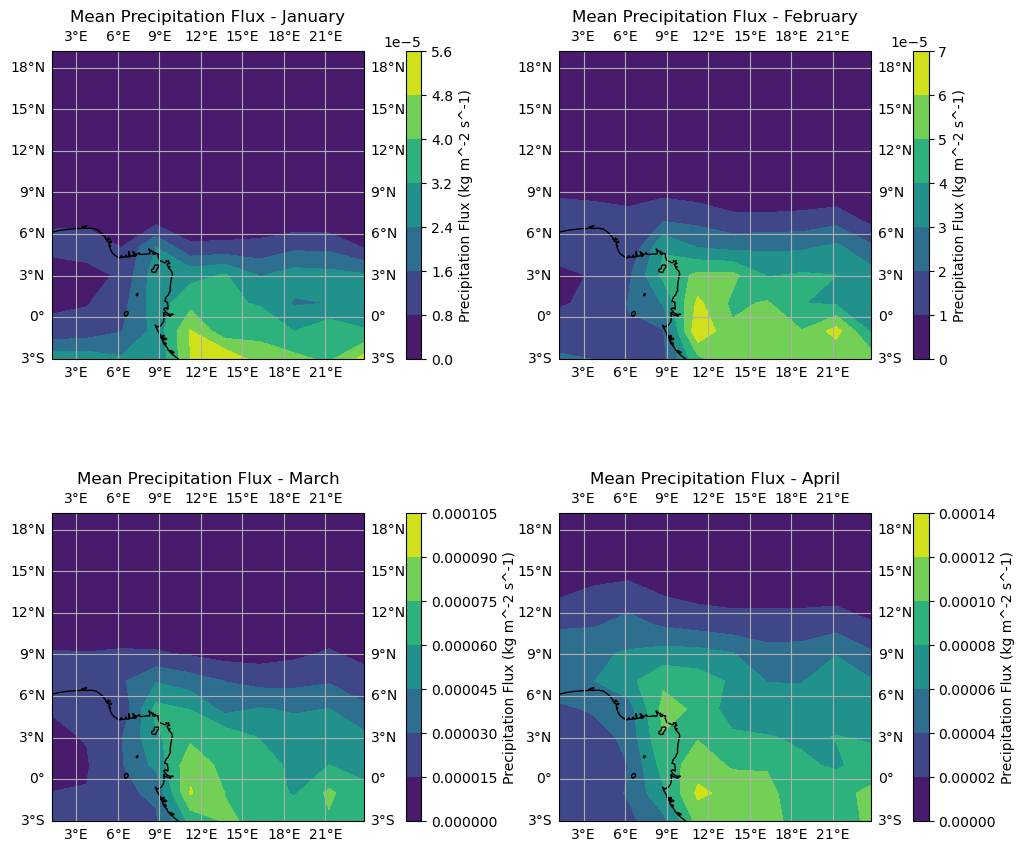

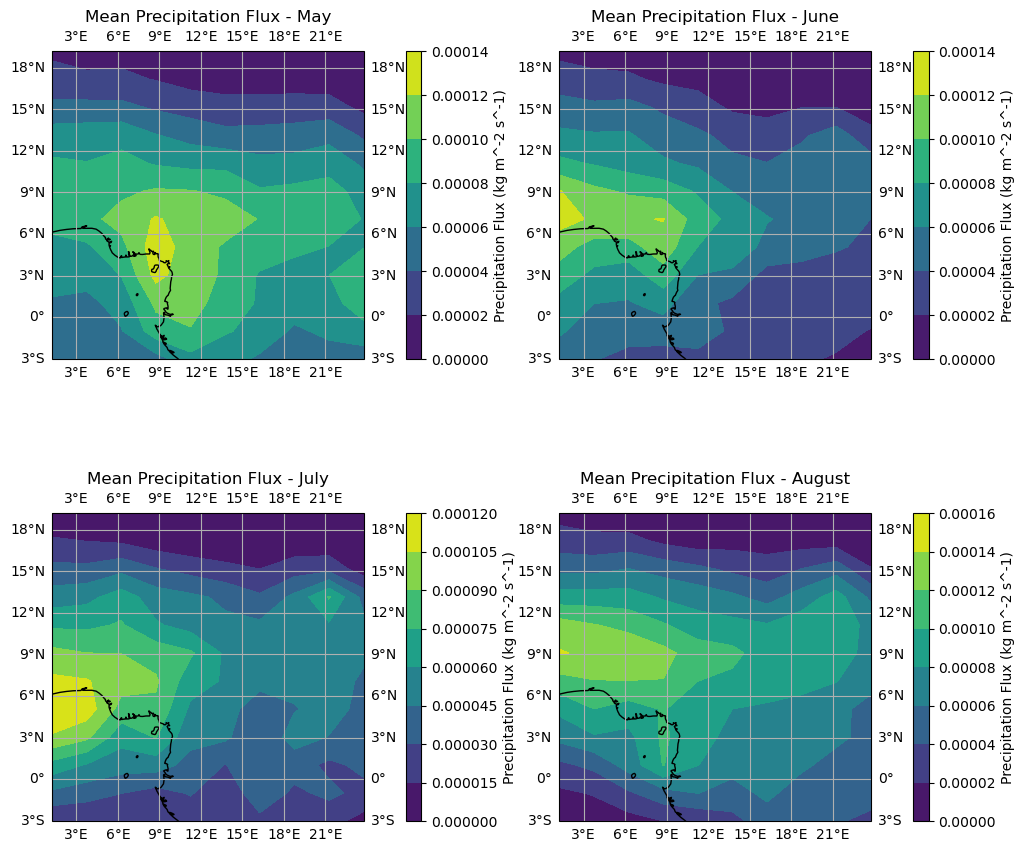

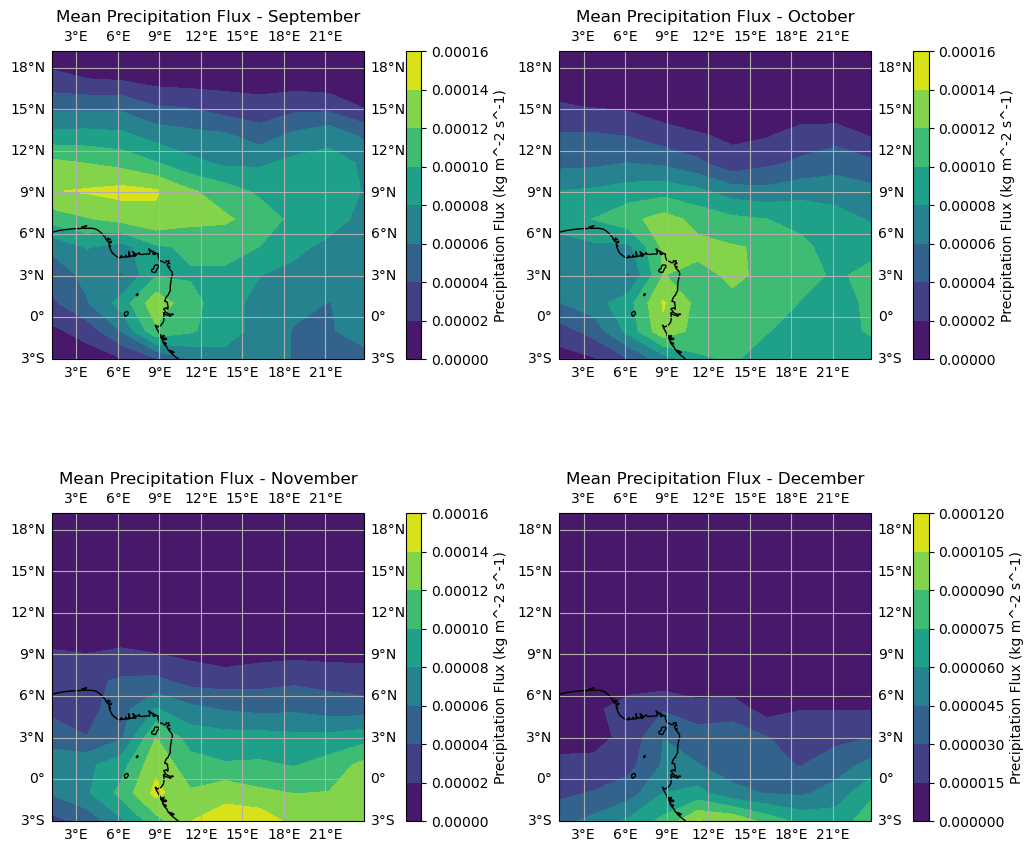

In [143]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# Assuming you have an xarray DataArray 'pr_flux' with 'time', 'lat', 'lon'
# pr_flux = ...

# Create a directory to save figures
save_dir = 'figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define all months
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Repeat the process three times for the entire year
for plot_num in range(3):
    # Create a Cartopy GeoAxes grid for each plot
    fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 10))
    fig.subplots_adjust(hspace=0.5)

    # Flatten the 2D array of subplots for easy iteration
    axes_flat = axes.flatten()

    # Select and save each month for the current plot
    for i, month in enumerate(months[plot_num * 4: (plot_num + 1) * 4]):
        # Select the month
        selected_month = pr_flux.sel(time=pr_flux['time.month'] == month)

        # Plotting the data using contourf
        cf = axes_flat[i].contourf(selected_month['lon'], selected_month['lat'], selected_month.mean(dim='time'),
                                   transform=ccrs.PlateCarree(), cmap='viridis')

        # Add colorbar
        cbar = plt.colorbar(cf, ax=axes_flat[i], orientation='vertical', pad=0.1)
        cbar.set_label('Precipitation Flux (kg m^-2 s^-1)')

        # Add coastlines, gridlines, etc.
        axes_flat[i].coastlines()
        axes_flat[i].gridlines(draw_labels=True)

        # Set the title
        axes_flat[i].set_title(f'Mean Precipitation Flux - {selected_month.time.values[0].strftime("%B")}')

    # Save the figure for the current plot
    fig.savefig(os.path.join(save_dir, f'pr_flux_plot_quarter_{plot_num + 1}.png'), bbox_inches='tight')
    plt.show()
